# Aryan Salemabadi

# Quantum Circuits

For your first graded code you should enter a code to create
$$\frac{1}{{\sqrt{2}}} (|000\rangle - |101\rangle)$$

For Your second graded code, you should modify return value of circuit() function in order to evaluate expectation value of the first two qubits using PauliZ operator


In [155]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt


In [156]:
dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,2])
    qml.CZ(wires=[0,2])
    return qml.state()


circuit()


tensor([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j], requires_grad=True)

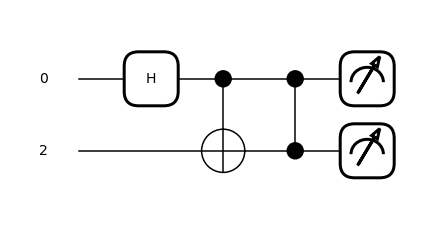

In [157]:
qml.drawer.use_style("black_white")
qml.draw_mpl(circuit)()
plt.show()


# Parameterized Gates

In this phase of your assignment, you should apply single qubit (Z,Y) rotations to one qubit in order and evaluate the returned values of the defined quantum node

HINT:

1. Please consider the order (Z,Y)
2. Try to parameterize your Gates using {params[i] for ith parameter}

For your fourth and last graded code in this assignment, you should modify the return value pf parameterized_circuit(params) in order to evaluate the tensor product of observables $Z\otimes Y \otimes X$

HINT:

1. use this pattern as we talked in the class { qml.expval(PauliZ(...) @ ...) }


In [158]:
dev2 = qml.device("default.qubit", wires=1)


@qml.qnode(dev2)
def parameterized_circuit(params):
    qml.RZ(params[0], wires=0)
    qml.RY(params[1], wires=0)
    return qml.expval(qml.PauliZ(0)@qml.PauliY(0)@qml.PauliX(0))


In [159]:
params = [0.5, 0.2]
result = parameterized_circuit(params)
print(result)


0.9800665778412411


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\pennylane\operation.py:1945: UserWarning: Tensor object acts on overlapping wires; in some PennyLane functions this will lead to undefined behaviour
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\pennylane\operation.py:2141: UserWarning: Tensor object acts on overlapping wires; in some PennyLane functions this will lead to undefined behaviour
  warnings.warn(


Cell below will initialize the parameters of the parameterized_circuit and compute the the returned value of the function.
one can notice ,due to the random initialization, the mentioned value will be differernt during each cell run.


In [160]:
params = np.random.rand(3)
parameterized_circuit(params)


tensor(0.96421619, requires_grad=True)